In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
import time
import seaborn as sns

from model import FFNN
from utils import plot_weights_distribution

In [5]:
def load_mnist():
    print("Loading MNIST dataset...")
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
    
    X = X / 255.0
    
    y = y.astype(int)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    
    y_train_onehot = np.zeros((y_train.shape[0], 10))
    y_train_onehot[np.arange(y_train.shape[0]), y_train] = 1
    
    y_test_onehot = np.zeros((y_test.shape[0], 10))
    y_test_onehot[np.arange(y_test.shape[0]), y_test] = 1
    
    print(f"Data loaded: X_train: {X_train.shape}, y_train: {y_train.shape}")
    
    return X_train, X_test, y_train, y_train_onehot, y_test, y_test_onehot

In [6]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [7]:
def visualize_predictions(X_test, y_test, y_pred, n_samples=5):
    
    indices = np.random.choice(len(X_test), n_samples, replace=False)
    
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        plt.subplot(1, n_samples, i+1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [8]:
X_train, X_test, y_train, y_train_onehot, y_test, y_test_onehot = load_mnist()

subset_pct = 0.5 # 50% of data, set subset_pct = 1 to train with all the data 
subset_size = int(len(X_train) * subset_pct)
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]
y_train_onehot_subset = y_train_onehot[:subset_size]

print(f"Using subset of data: {X_train_subset.shape}")

Loading MNIST dataset...
Data loaded: X_train: (56000, 784), y_train: (56000,)
Using subset of data: (28000, 784)


In [2]:
print("Training Custom FFNN")

# Input layer 28 x 28 = 784 inputs
# Output (softmax) = 10 outputs (0 - 9)
layers_config = [
    (784, None),            
    (128, "relu"),
    (10, "softmax")         
]

custom_model = FFNN(
    layers_config=layers_config, 
    loss="categorical_crossentropy",
    weight_init_method="he"
)

custom_model.summary()

custom_model.visualize()

start_time = time.time()
custom_history = custom_model.train(
    X_train_subset, 
    y_train_onehot_subset,
    epochs=20,
    batch_size=32,
    learning_rate=0.01,
    verbose=1
)
custom_train_time = time.time() - start_time

custom_predictions = custom_model.forward(X_test)
custom_pred_classes = np.argmax(custom_predictions, axis=1)
custom_accuracy = accuracy_score(y_test, custom_pred_classes)

Training Custom FFNN


NameError: name 'FFNN' is not defined

In [8]:
print("Training sklearn MLPClassifier")
sklearn_model = MLPClassifier(
    hidden_layer_sizes=(128,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size=32,
    learning_rate='constant',
    learning_rate_init=0.01,
    max_iter=20,
    random_state=69,
    verbose=True
)

start_time = time.time()
sklearn_model.fit(X_train_subset, y_train_subset)
sklearn_train_time = time.time() - start_time

sklearn_pred_classes = sklearn_model.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, sklearn_pred_classes)

Training sklearn MLPClassifier
Iteration 1, loss = 0.29119480
Iteration 2, loss = 0.17450221
Iteration 3, loss = 0.15490728
Iteration 4, loss = 0.14522081
Iteration 5, loss = 0.13299683
Iteration 6, loss = 0.12882685
Iteration 7, loss = 0.12489648
Iteration 8, loss = 0.12490692
Iteration 9, loss = 0.11868435
Iteration 10, loss = 0.11473357
Iteration 11, loss = 0.11889152
Iteration 12, loss = 0.11650231
Iteration 13, loss = 0.11783470
Iteration 14, loss = 0.11971113
Iteration 15, loss = 0.11182203
Iteration 16, loss = 0.10883751
Iteration 17, loss = 0.10868214
Iteration 18, loss = 0.11446641
Iteration 19, loss = 0.10950526
Iteration 20, loss = 0.13382552


c:\Users\alfre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Results Comparison
Custom FFNN accuracy: 0.9480 (training time: 24.58s)
scikit-learn MLP accuracy: 0.9561 (training time: 28.73s)

Custom FFNN Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1328
           1       0.97      0.98      0.97      1594
           2       0.95      0.94      0.95      1400
           3       0.93      0.92      0.93      1417
           4       0.94      0.95      0.94      1371
           5       0.93      0.94      0.93      1258
           6       0.96      0.97      0.96      1417
           7       0.96      0.95      0.96      1473
           8       0.94      0.92      0.93      1369
           9       0.93      0.92      0.93      1373

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000


scikit-learn MLP Classification Report:
              precision    recall 

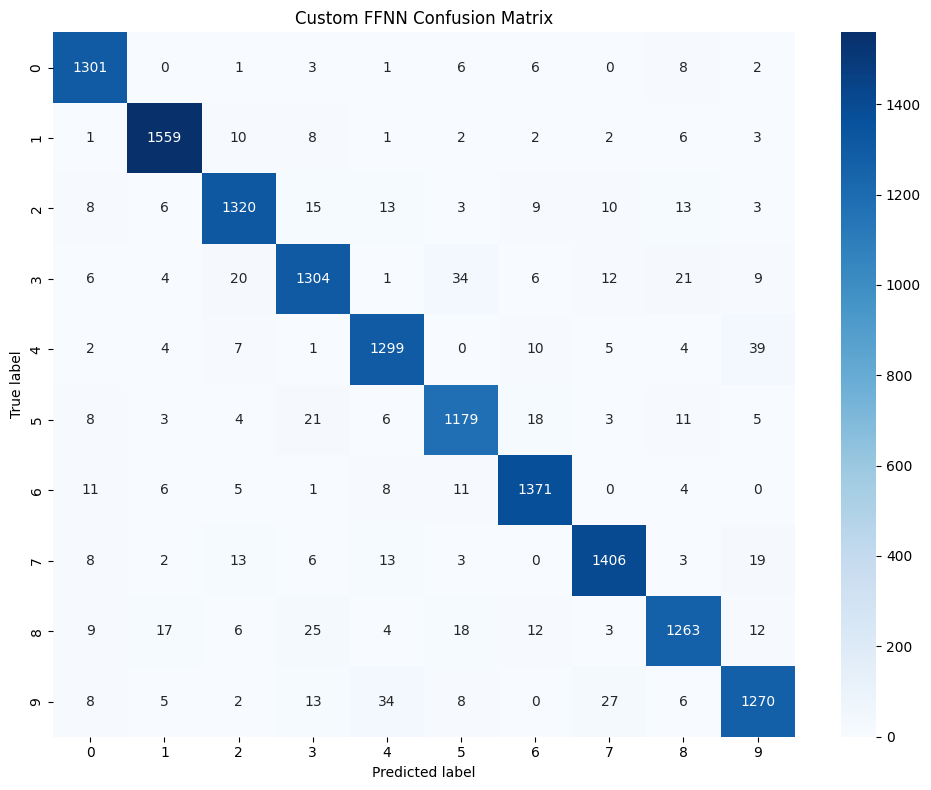

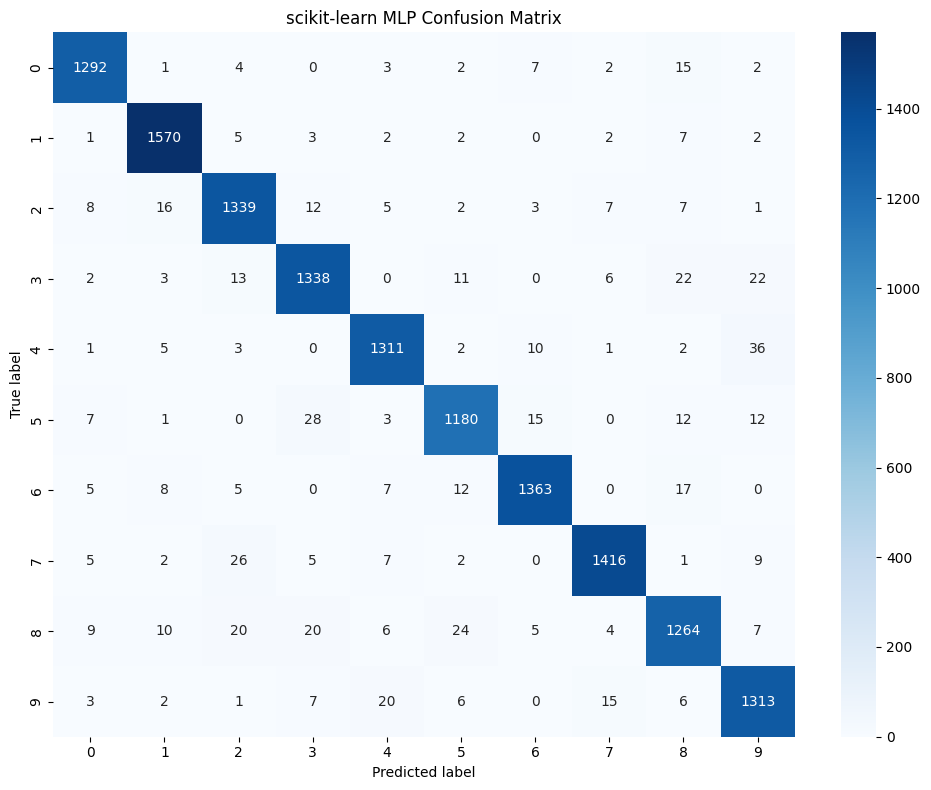


Custom FFNN Predictions:


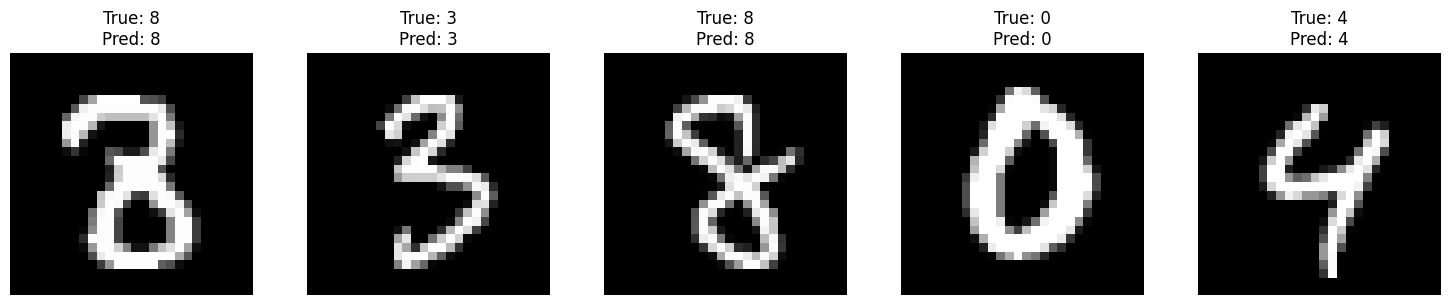


scikit-learn MLP Predictions:


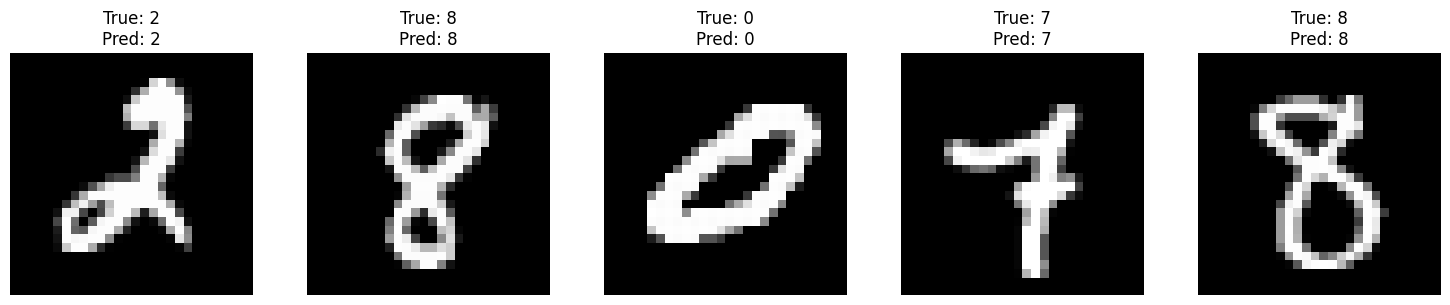

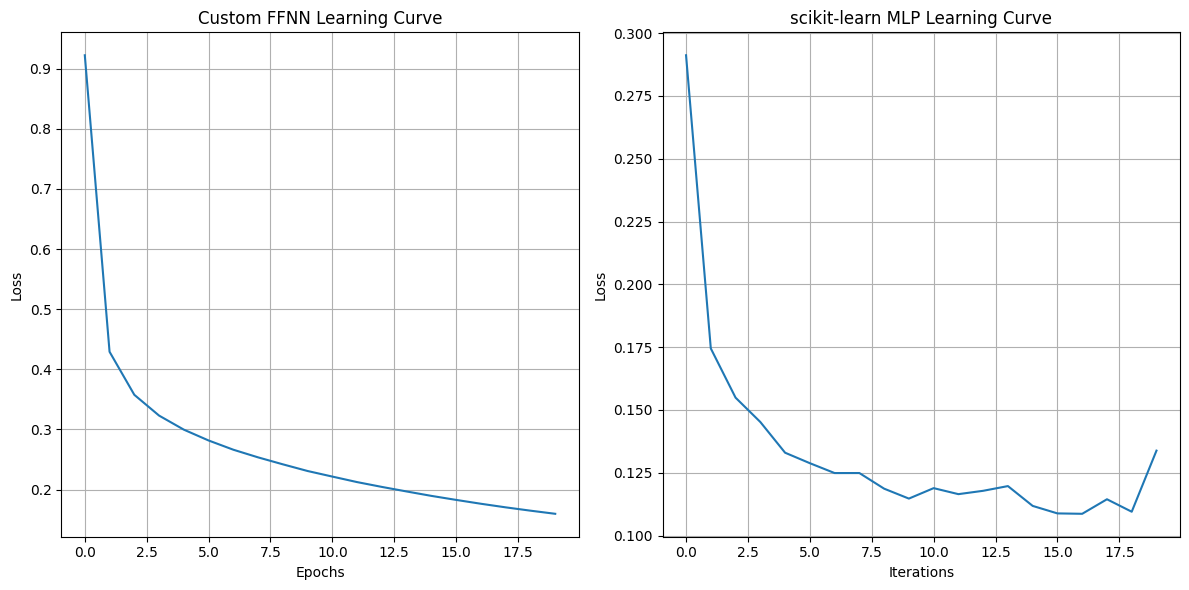

Weight Distributions


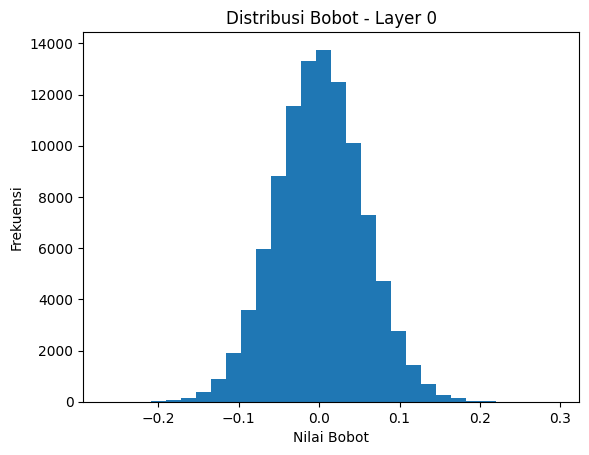

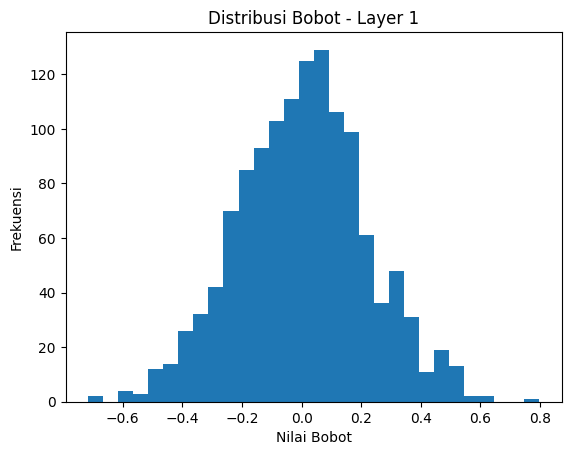

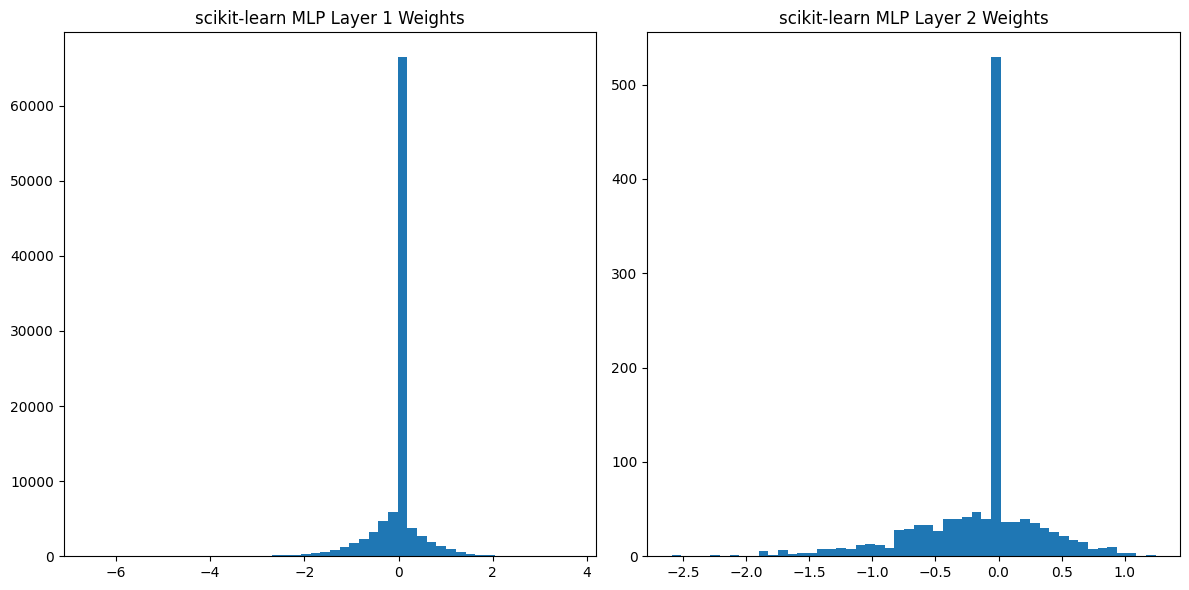

In [17]:
print("Results Comparison")
print(f"Custom FFNN accuracy: {custom_accuracy:.4f} (training time: {custom_train_time:.2f}s)")
print(f"scikit-learn MLP accuracy: {sklearn_accuracy:.4f} (training time: {sklearn_train_time:.2f}s)")

print("\nCustom FFNN Classification Report:")
print(classification_report(y_test, custom_pred_classes))

print("\nscikit-learn MLP Classification Report:")
print(classification_report(y_test, sklearn_pred_classes))

plot_confusion_matrix(y_test, custom_pred_classes, "Custom FFNN Confusion Matrix")
plot_confusion_matrix(y_test, sklearn_pred_classes, "scikit-learn MLP Confusion Matrix")

print("\nCustom FFNN Predictions:")
visualize_predictions(X_test, y_test, custom_pred_classes)

print("\nscikit-learn MLP Predictions:")
visualize_predictions(X_test, y_test, sklearn_pred_classes)

if hasattr(sklearn_model, 'loss_curve_'):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(custom_history['train_loss'], label='Custom FFNN')
    plt.title('Custom FFNN Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(sklearn_model.loss_curve_, label='scikit-learn MLP')
    plt.title('scikit-learn MLP Learning Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

print("Weight Distributions")
plot_weights_distribution(custom_model, [0, 1])

plt.figure(figsize=(12, 6))
for i, weights in enumerate(sklearn_model.coefs_):
    plt.subplot(1, len(sklearn_model.coefs_), i+1)
    plt.hist(weights.flatten(), bins=50)
    plt.title(f'scikit-learn MLP Layer {i+1} Weights')
plt.tight_layout()
plt.show()